In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load the dataset
file_path = "C:/Users/samra/Downloads/car price prediction.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")
print("Dataset loaded successfully!\n")
print(df.head())

Dataset loaded successfully!

   index     name        year  selling_price  km_driven    fuel seller_type  \
0      0   Maruti        2014       450000.0     145500  Diesel  Individual   
1      2  Hyundai        2010       225000.0     127000  Diesel  Individual   
2      4  Hyundai  2017-01-01       440000.0      45000  Petrol  Individual   
3      7   TOYOTA        2011       350000.0      90000  Diesel  Individual   
4      8     Ford          13       200000.0     169000  Diesel  Individual   

  transmission        owner  seats  max_power (in bph) Mileage Unit  Mileage  \
0       Manual  First Owner      5               74.00         kmpl    23.40   
1       Manual  First Owner      5               90.00        km/kg    23.00   
2       Manual  First Owner      5               81.86         kmpl    20.14   
3       Manual  First Owner      5               67.10         kmpl    23.59   
4       Manual  First Owner      5               68.10         kmpl    20.00   

   Engine (CC)

In [15]:
# Handle missing values
df["selling_price"] = df["selling_price"].fillna(df["selling_price"].median())
df["fuel"] = df["fuel"].fillna(df["fuel"].mode()[0])

In [21]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("\n🔹 Removing duplicates...")


🔹 Removing duplicates...


In [19]:
# Standardize Data Formats
print("\n🔹 Standardizing Data Formats...")

# Fix 'year' column (handles '2017-01-01' issue)
df["year"] = pd.to_datetime(df["year"], errors="coerce").dt.year
df["year"] = df["year"].fillna(df["year"].mode()[0])
df["year"] = df["year"].astype(int)

# Convert Mileage, Engine, and Max Power to numerical values
if "mileage" in df.columns:
    df["mileage"] = df["mileage"].str.replace(" kmpl", "", regex=False)
    df["mileage"] = df["mileage"].str.replace(" km/kg", "", regex=False)
    df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce")

if "max_power_(in_bhp)" in df.columns:
    df["max_power_(in_bhp)"] = df["max_power_(in_bhp)"].astype(str).str.replace(" bhp", "", regex=False)
    df["max_power_(in_bhp)"] = pd.to_numeric(df["max_power_(in_bhp)"], errors="coerce")

if "engine" in df.columns:
    df["engine"] = df["engine"].str.replace(" CC", "", regex=False)
    df["engine"] = pd.to_numeric(df["engine"], errors="coerce")


🔹 Standardizing Data Formats...


In [23]:
# Outlier detection and handling (capping)
numeric_cols = ["selling_price", "km_driven", "Mileage", "max_power (in bph)", "Engine (CC)"]
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def cap_outliers(value, lower, upper):
    return np.where(value < lower, lower, np.where(value > upper, upper, value))

df[numeric_cols] = df[numeric_cols].apply(lambda x: cap_outliers(x, lower_bound[x.name], upper_bound[x.name]))

In [27]:
# Summary Statistics
print("\n🔹 Summary Statistics:")
print(df.describe())
summary_stats = pd.DataFrame({
    "Mean": df[numeric_cols].mean(),
    "Median": df[numeric_cols].median(),
    "Mode": df[numeric_cols].mode().iloc[0],
    "Variance": df[numeric_cols].var(),
    "Standard Deviation": df[numeric_cols].std()
})
print("\nDetailed Summary Statistics:")
print(summary_stats)


🔹 Summary Statistics:
             index    year  selling_price      km_driven        seats  \
count  2095.000000  2095.0   2.095000e+03    2095.000000  2095.000000   
mean   3155.537947  1970.0   4.242441e+05   66818.085919     5.096897   
std    1791.039215     0.0   2.225469e+05   39686.644077     0.457000   
min       0.000000  1970.0   4.595700e+04    1000.000000     4.000000   
25%    1589.500000  1970.0   2.500000e+05   35000.000000     5.000000   
50%    3185.000000  1970.0   3.900000e+05   60000.000000     5.000000   
75%    4709.500000  1970.0   5.530000e+05   90000.000000     5.000000   
max    6256.000000  1970.0   1.007500e+06  172500.000000     8.000000   

       max_power (in bph)      Mileage  Engine (CC)  
count         2095.000000  2095.000000  2095.000000  
mean            77.121427    21.397928  1205.078282  
std             19.196879     1.209234   245.058696  
min             35.000000    19.600000   624.000000  
25%             67.040000    20.360000   998.0000

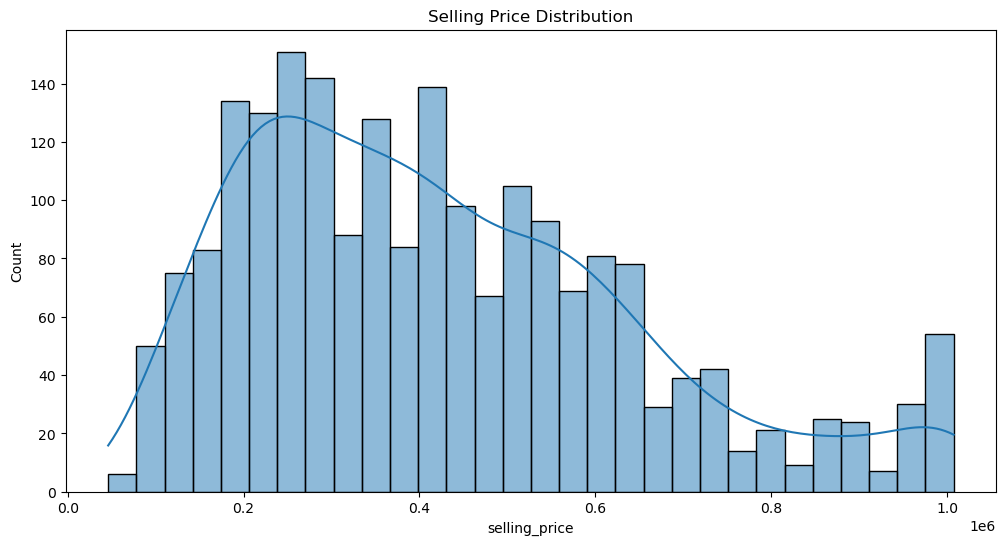

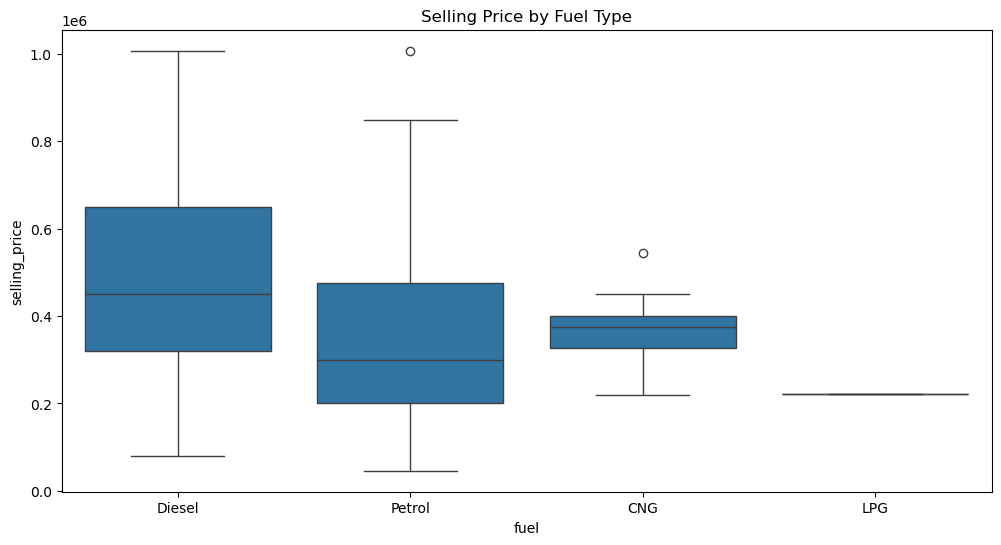

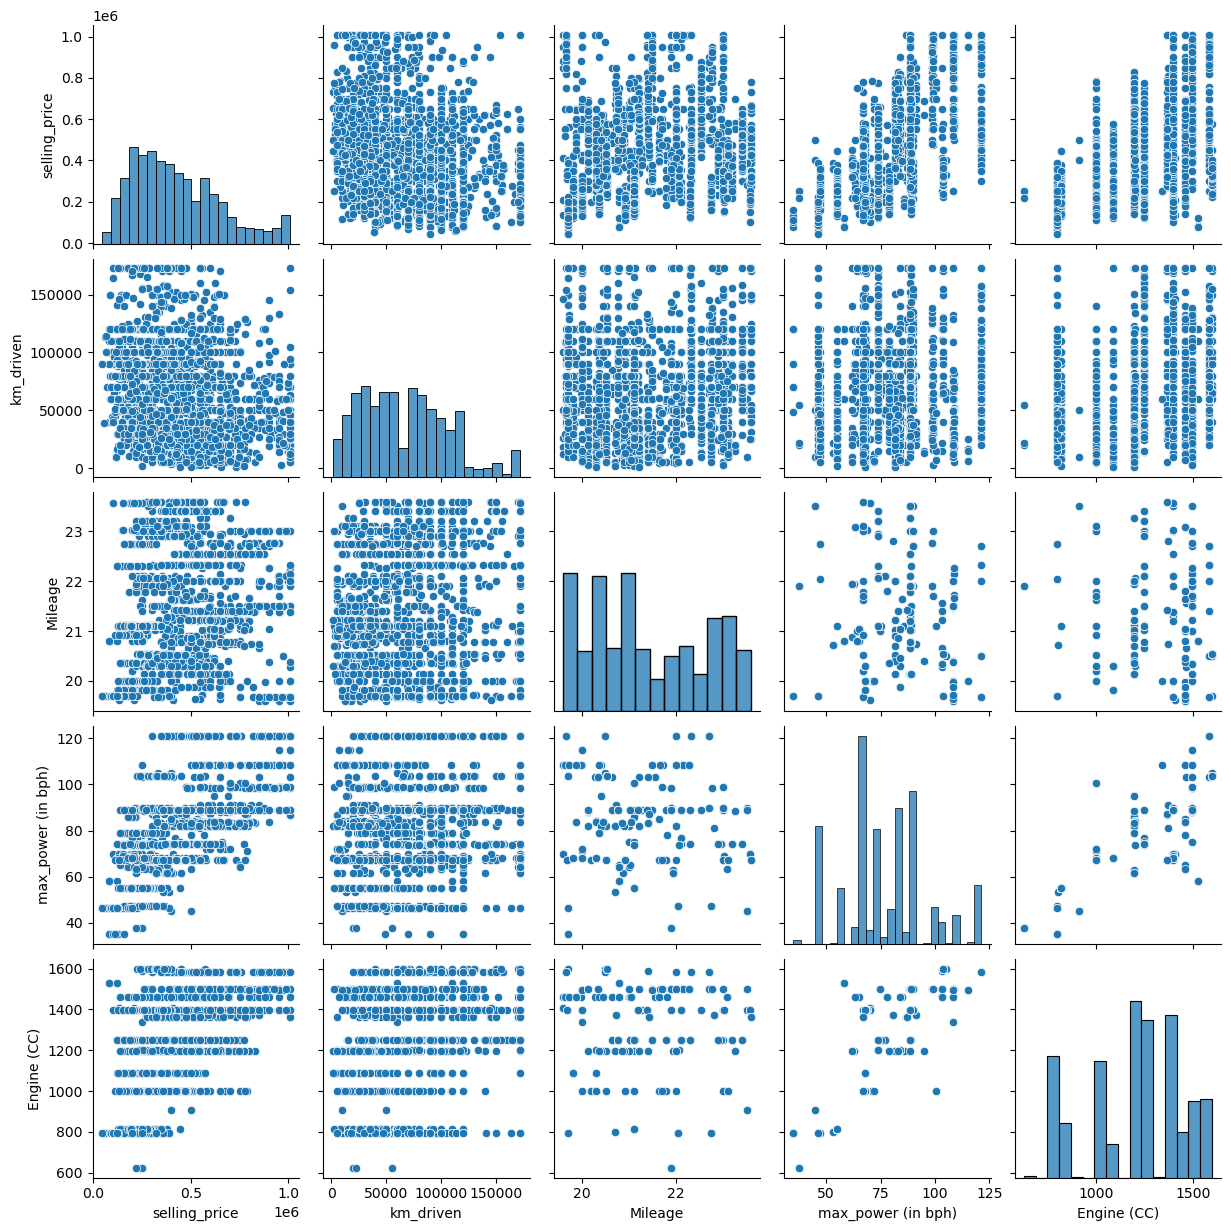

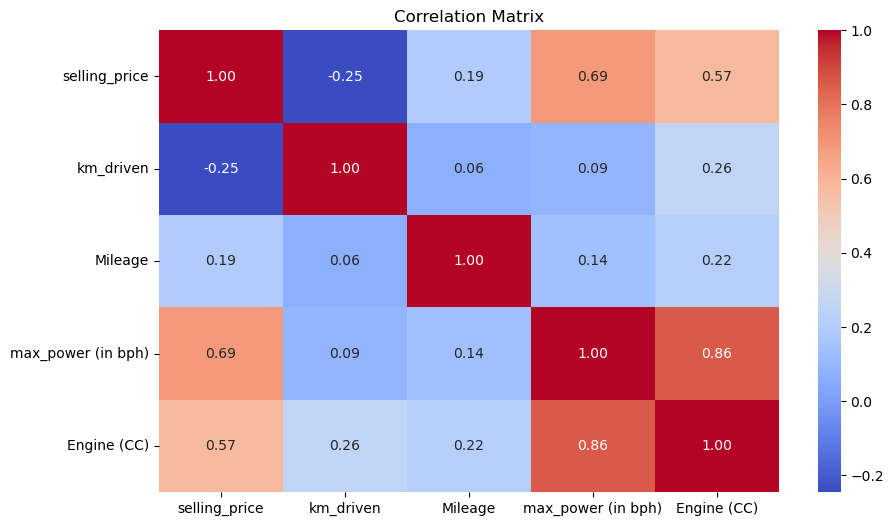

In [29]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(df["selling_price"], bins=30, kde=True)
plt.title("Selling Price Distribution")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["fuel"], y=df["selling_price"])
plt.title("Selling Price by Fuel Type")
plt.show()

sns.pairplot(df[numeric_cols])
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [31]:
# Additional Insights
print("\n🔹 Additional Insights:")
if "name" in df.columns:
        print("Most common car brand:", df["name"].str.split().str[0].mode()[0])
if "fuel" in df.columns:
        print("Most common fuel type:", df["fuel"].mode()[0])
if "selling_price" in df.columns:
        print("Most expensive car:", df.loc[df["selling_price"].idxmax(), "name"])
if "mileage" in df.columns:
        print("Most fuel-efficient car:", df.loc[df["mileage"].idxmax(), "name"])


🔹 Additional Insights:
Most common car brand: Maruti
Most common fuel type: Diesel
Most expensive car: Hyundai


In [33]:
# Save cleaned dataset
df.to_csv("cleaned_car_price_data.csv", index=False)
print("Data preprocessing completed. Cleaned data saved to 'cleaned_car_price_data.csv'.")

Data preprocessing completed. Cleaned data saved to 'cleaned_car_price_data.csv'.


In [57]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
# Load the cleaned dataset
df = pd.read_csv("cleaned_car_price_data.csv")
print(df.head())

   index     name  year  selling_price  km_driven    fuel seller_type  \
0      0   Maruti  1970       450000.0   145500.0  Diesel  Individual   
1      2  Hyundai  1970       225000.0   127000.0  Diesel  Individual   
2      4  Hyundai  1970       440000.0    45000.0  Petrol  Individual   
3      7   TOYOTA  1970       350000.0    90000.0  Diesel  Individual   
4      8     Ford  1970       200000.0   169000.0  Diesel  Individual   

  transmission        owner  seats  max_power (in bph) Mileage Unit  Mileage  \
0       Manual  First Owner      5               74.00         kmpl    23.40   
1       Manual  First Owner      5               90.00        km/kg    23.00   
2       Manual  First Owner      5               81.86         kmpl    20.14   
3       Manual  First Owner      5               67.10         kmpl    23.59   
4       Manual  First Owner      5               68.10         kmpl    20.00   

   Engine (CC)  
0       1248.0  
1       1396.0  
2       1197.0  
3       1364

In [61]:
# Drop non-numeric or non-useful columns
df_model = df.drop(columns=["name", "owner", "torque", "Unnamed: 0"], errors='ignore')
df_model = pd.get_dummies(df_model, drop_first=True)  # Encode categoricals

# Define X and y
X = df_model.drop("selling_price", axis=1)
y = df_model["selling_price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# Dimensionality Reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [75]:
# Model Training & Evaluation Function
results = []

def evaluate_model(model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    rmse = np.sqrt(mean_squared_error(y_te, preds))
    mae = mean_absolute_error(y_te, preds)
    r2 = r2_score(y_te, preds)
    results.append({
        'Model': model.__class__.__name__,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })
    print(f"{model.__class__.__name__}:")
    print("  RMSE:", rmse)
    print("  MAE:", mae)
    print("  R2 Score:", r2)
    print("-" * 40)

models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    XGBRegressor(random_state=42, verbosity=0)
]

print("\n🔹 Model Evaluation Results:")
for model in models:
    evaluate_model(model, X_train_pca, X_test_pca, y_train, y_test)


🔹 Model Evaluation Results:
LinearRegression:
  RMSE: 130212.07606258104
  MAE: 99652.74231648828
  R2 Score: 0.6161867558775009
----------------------------------------
DecisionTreeRegressor:
  RMSE: 176363.4443045435
  MAE: 119417.67780429595
  R2 Score: 0.2958996277314705
----------------------------------------
RandomForestRegressor:
  RMSE: 109591.35274948373
  MAE: 78458.25288782816
  R2 Score: 0.728124542126604
----------------------------------------
XGBRegressor:
  RMSE: 118058.46321897357
  MAE: 84566.02491050119
  R2 Score: 0.6844910512553583
----------------------------------------


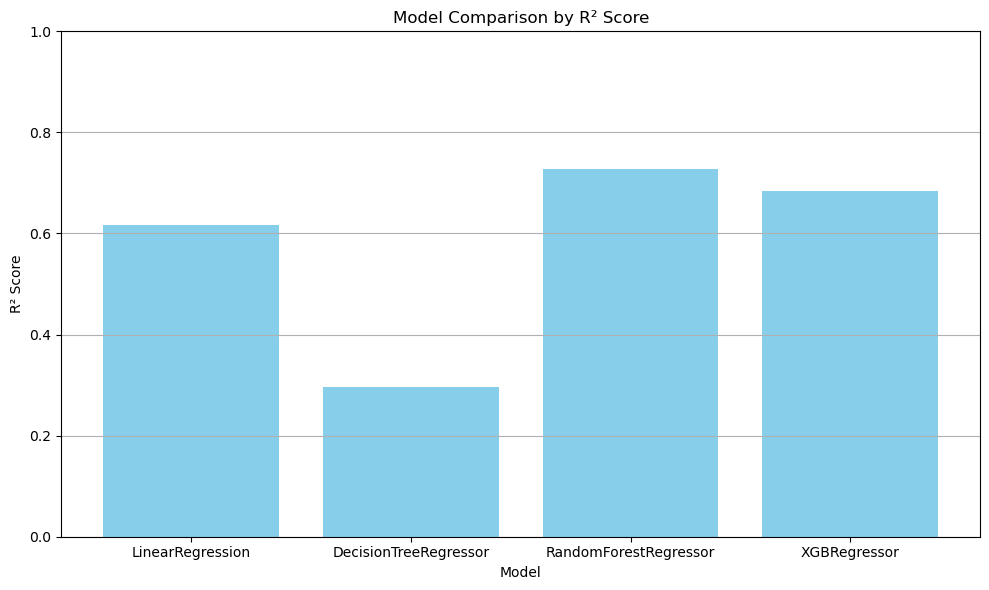

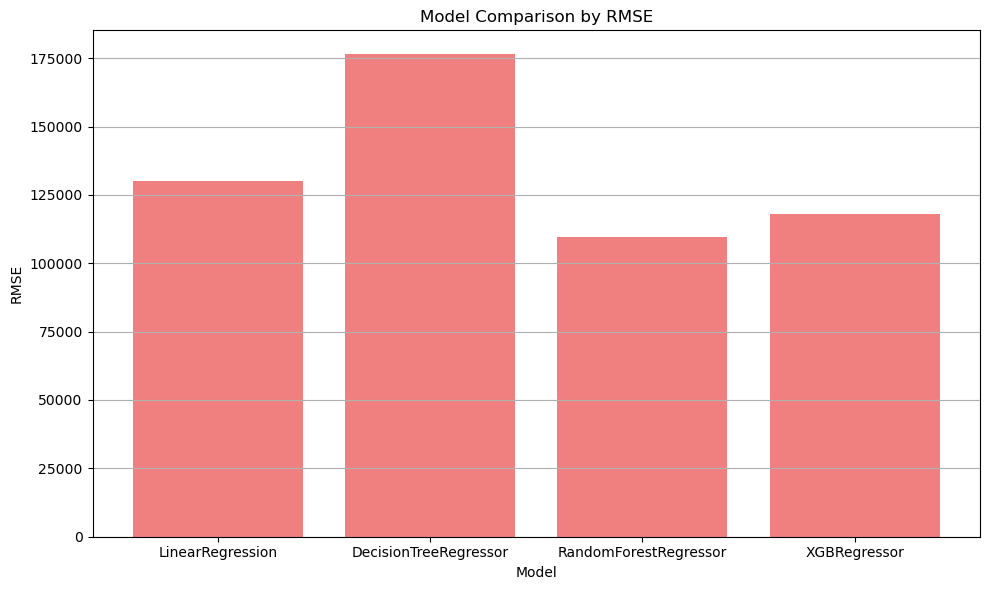

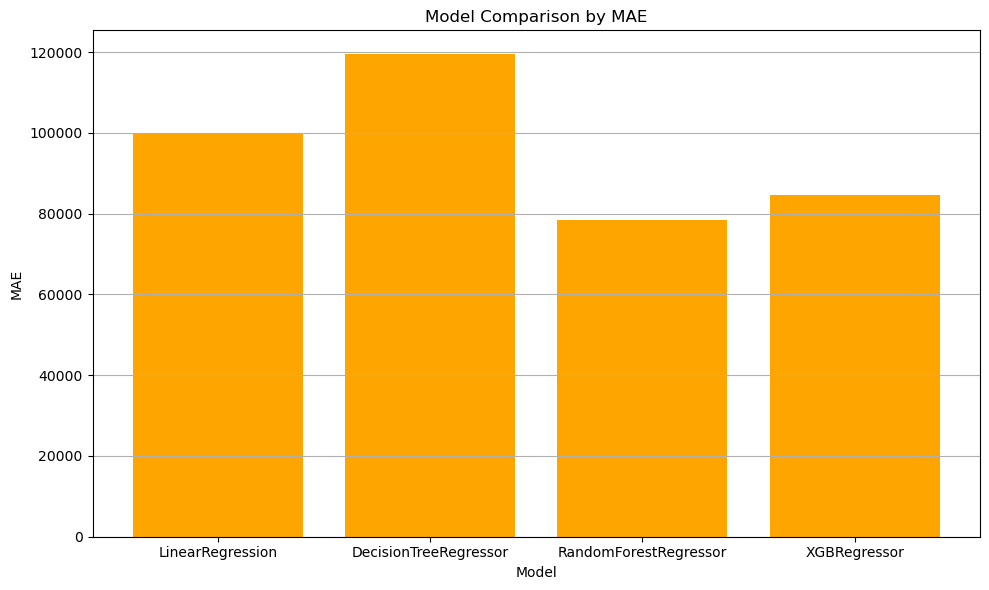

In [81]:
# Plotting R2, RSME and MAE Score Comparison
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R2 Score'], color='skyblue')
plt.title('Model Comparison by R² Score')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE'], color='lightcoral')
plt.title('Model Comparison by RMSE')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['MAE'], color='orange')
plt.title('Model Comparison by MAE')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.grid(axis='y')
plt.tight_layout()
plt.show()